# Linear Neural Network - Softmax Regression

In this notebook, we cast the Softmax Regression model for multi-class classification as a Linear Neural Network (LNN) model. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

np.random.seed(43)

## Decision Bounday: Using Various Thresholds for a Class Probability

We define a function to show the decision boundaries at various thresholds of a class probability. Using the different estimates for a single class, we generate a contour plot. 

In [2]:
def decision_boundary_class_colored(clf, X):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points        
    y_pred = np.argmax(clf.predict(X_new), axis=-1).reshape(x1.shape)
    
   
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.summer, alpha=0.9)

## Multiclass Dataset


We will use the iris dataset, which is a multivariate data set.

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features:

- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)


We will use two features (i.e., petal length, petal width).

X shape:  (150, 2)
y shape:  (150,)
Number of classes:  3
Class labels:  [0 1 2]


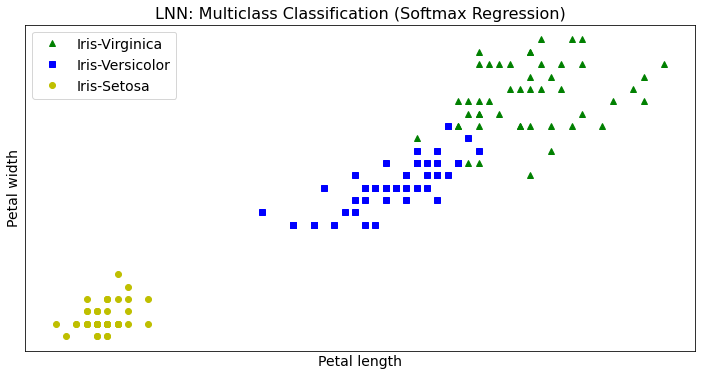

In [3]:
iris = load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("Number of classes: ", len(np.unique(y)))
print("Class labels: ", np.unique(y))

label = y

plt.figure(figsize=(12, 6))    
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("LNN: Multiclass Classification (Softmax Regression)", fontsize=16)
plt.xticks(())
plt.yticks(())

plt.show()

## Create a LNN Model

Using the Keras Dense layer we create a LNN model for Softmax Regression. **In a Dense layer, each neuron is connected to all inputs/neurons of the previous layer**.

The LNN model:
- has 3 neurons because it's a 3-class classification problem.
- uses the softmax activation function.

At first, we need to specify the shape of the input using the Input layer. The Input layer is used to instantiate a Keras tensor, which is a TensorFlow symbolic tensor object.
- We must set the "shape" parameter, which is a tuple (integers) idicating the dimension of the input vectors. In this demo, input is a 2D vector, that's why we simply put [2, ] in the tuple. In image classification problems, an image input will be represented as a matrix, in which case we will need to specify the size of the matrix. For example, for 28 x 28 image input matrix, "shape" tuple will be [28, 28]. Note that we don't need to include the batch size.

Dense layer:
- kernel_initializer: we initialize the weights (also known as kernel) with zero values. In logistic/softmax regression, initial zero weight values are ok. However, in nonlinear neural networks, such as in Multi-layer Perceptron (MLPs), we must use small random values to initialize the weights. For that we need to use sophisticated initializers, such as glorot or he.
- activation: we use softmax activation

In [4]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
'''
model = tf.keras.models.Sequential(name="LNN_Multiclass_Classifier")
model.add(tf.keras.layers.InputLayer(input_shape=[2,]))
#model.add(tf.keras.layers.Dense(units=4, kernel_initializer="he_normal", activation="relu"))
model.add(tf.keras.layers.Dense(units=3, kernel_initializer="zeros", activation="softmax", use_bias=True))

'''
Display a summary of the model layers and its parameters
'''
model.summary()

Model: "LNN_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
CPU times: user 25.6 ms, sys: 6.55 ms, total: 32.2 ms
Wall time: 32.9 ms


2022-04-11 18:22:49.809681: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


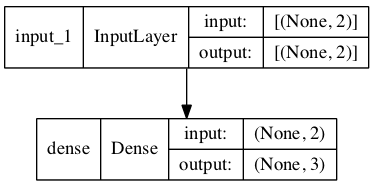

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
weights, biases = model.layers[0].get_weights()
print("1st Hidden Layer Matrix:\n", weights)


# weights, biases = model.layers[1].get_weights()
# print("\n2nd Hidden Layer Matrix:\n", weights)

1st Hidden Layer Matrix:
 [[0. 0. 0.]
 [0. 0. 0.]]


In [7]:
weights, biases = model.layers[0].get_weights()

print("Hidden Layer Matrix:\n", weights)

print("\nHidden Layer Matrix Dimension:\n", weights.shape)

print("\nHidden Layer Bias:\n", biases)

print("\nHidden Layer Bias Dimension:\n", biases.shape)

Hidden Layer Matrix:
 [[0. 0. 0.]
 [0. 0. 0.]]

Hidden Layer Matrix Dimension:
 (2, 3)

Hidden Layer Bias:
 [0. 0. 0.]

Hidden Layer Bias Dimension:
 (3,)


## Compile & Train the LNN Model

A Keras model automatically uses the **Backpropagation** algorithm to train an ANN. However, we need to specify an optimization algorithm. 

There are various advanced optimizers. For the LNN we will use the **Stochastic Gradient Descent (SGD)** optimizer. It requires us to set a suitable learning rate.  

We will use the mini-batch SGD. Thus we need to specify the batch size as well as the epochs.

In [8]:
'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.3)

'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

'''
Set the epochs and batch size
'''
no_of_epochs = 300
size_of_mini_batch = 64

'''
Train the model
'''
history = model.fit(X, y, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    validation_split=0.1, # Fraction of the training data to be used as validation data. 
                    verbose=1)

Epoch 1/300
3/3 [==============================] - 1s 81ms/step - loss: 1.0898 - accuracy: 0.3333 - val_loss: 1.9579 - val_accuracy: 0.0000e+00
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 1.1700 - accuracy: 0.2963 - val_loss: 1.0240 - val_accuracy: 0.0000e+00
Epoch 3/300
3/3 [==============================] - 0s 14ms/step - loss: 0.9414 - accuracy: 0.5630 - val_loss: 0.5802 - val_accuracy: 1.0000
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 0.8817 - accuracy: 0.7037 - val_loss: 3.1846 - val_accuracy: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 14ms/step - loss: 1.2866 - accuracy: 0.5778 - val_loss: 0.1715 - val_accuracy: 1.0000
Epoch 6/300
3/3 [==============================] - 0s 14ms/step - loss: 1.0514 - accuracy: 0.6667 - val_loss: 1.2784 - val_accuracy: 0.0000e+00
Epoch 7/300
3/3 [==============================] - 0s 14ms/step - loss: 0.7604 - accuracy: 0.8074 - val_loss: 0.4087 - val_accuracy: 1.0000
Epoc

3/3 [==============================] - 0s 13ms/step - loss: 0.4130 - accuracy: 0.8667 - val_loss: 0.6927 - val_accuracy: 0.5333
Epoch 59/300
3/3 [==============================] - 0s 13ms/step - loss: 0.3930 - accuracy: 0.8222 - val_loss: 0.2225 - val_accuracy: 1.0000
Epoch 60/300
3/3 [==============================] - 0s 12ms/step - loss: 0.3826 - accuracy: 0.8963 - val_loss: 2.7720 - val_accuracy: 0.0000e+00
Epoch 61/300
3/3 [==============================] - 0s 13ms/step - loss: 0.8043 - accuracy: 0.6593 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 62/300
3/3 [==============================] - 0s 13ms/step - loss: 0.8514 - accuracy: 0.7037 - val_loss: 0.4991 - val_accuracy: 0.8000
Epoch 63/300
3/3 [==============================] - 0s 13ms/step - loss: 0.3738 - accuracy: 0.8889 - val_loss: 4.2033 - val_accuracy: 0.0000e+00
Epoch 64/300
3/3 [==============================] - 0s 13ms/step - loss: 0.9455 - accuracy: 0.7037 - val_loss: 2.3869 - val_accuracy: 0.0000e+00
Epoch 65/300
3

3/3 [==============================] - 0s 13ms/step - loss: 0.3180 - accuracy: 0.9037 - val_loss: 1.4524 - val_accuracy: 0.0000e+00
Epoch 116/300
3/3 [==============================] - 0s 13ms/step - loss: 0.3946 - accuracy: 0.8444 - val_loss: 0.3385 - val_accuracy: 1.0000
Epoch 117/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2939 - accuracy: 0.9333 - val_loss: 1.5569 - val_accuracy: 0.0000e+00
Epoch 118/300
3/3 [==============================] - 0s 13ms/step - loss: 0.3903 - accuracy: 0.8667 - val_loss: 0.4949 - val_accuracy: 0.6667
Epoch 119/300
3/3 [==============================] - 0s 14ms/step - loss: 0.3116 - accuracy: 0.9259 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 120/300
3/3 [==============================] - 0s 13ms/step - loss: 0.4616 - accuracy: 0.7333 - val_loss: 1.2178 - val_accuracy: 0.0667
Epoch 121/300
3/3 [==============================] - 0s 13ms/step - loss: 0.4021 - accuracy: 0.8148 - val_loss: 0.5036 - val_accuracy: 0.6667
Epoch 122/30

Epoch 173/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2653 - accuracy: 0.9333 - val_loss: 0.1890 - val_accuracy: 1.0000
Epoch 174/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2598 - accuracy: 0.9333 - val_loss: 0.2695 - val_accuracy: 1.0000
Epoch 175/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2731 - accuracy: 0.9259 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 176/300
3/3 [==============================] - 0s 13ms/step - loss: 0.4413 - accuracy: 0.7481 - val_loss: 0.5318 - val_accuracy: 0.6667
Epoch 177/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2919 - accuracy: 0.8963 - val_loss: 0.7059 - val_accuracy: 0.5333
Epoch 178/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2631 - accuracy: 0.9185 - val_loss: 0.2179 - val_accuracy: 1.0000
Epoch 179/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2439 - accuracy: 0.9481 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 

3/3 [==============================] - 0s 12ms/step - loss: 0.2253 - accuracy: 0.9556 - val_loss: 0.0400 - val_accuracy: 1.0000
Epoch 231/300
3/3 [==============================] - 0s 14ms/step - loss: 0.2523 - accuracy: 0.9111 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 232/300
3/3 [==============================] - 0s 14ms/step - loss: 0.2506 - accuracy: 0.8963 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 233/300
3/3 [==============================] - 0s 12ms/step - loss: 0.2719 - accuracy: 0.9037 - val_loss: 0.0798 - val_accuracy: 1.0000
Epoch 234/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2411 - accuracy: 0.9111 - val_loss: 1.0444 - val_accuracy: 0.4667
Epoch 235/300
3/3 [==============================] - 0s 13ms/step - loss: 0.3633 - accuracy: 0.8296 - val_loss: 0.1135 - val_accuracy: 1.0000
Epoch 236/300
3/3 [==============================] - 0s 12ms/step - loss: 0.2181 - accuracy: 0.9481 - val_loss: 0.1772 - val_accuracy: 1.0000
Epoch 237/300
3/3 [=

Epoch 288/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2989 - accuracy: 0.8667 - val_loss: 0.1017 - val_accuracy: 1.0000
Epoch 289/300
3/3 [==============================] - 0s 12ms/step - loss: 0.2244 - accuracy: 0.9259 - val_loss: 0.2219 - val_accuracy: 1.0000
Epoch 290/300
3/3 [==============================] - 0s 12ms/step - loss: 0.2195 - accuracy: 0.9407 - val_loss: 0.0829 - val_accuracy: 1.0000
Epoch 291/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2303 - accuracy: 0.9111 - val_loss: 0.2825 - val_accuracy: 0.9333
Epoch 292/300
3/3 [==============================] - 0s 13ms/step - loss: 0.1995 - accuracy: 0.9556 - val_loss: 0.2041 - val_accuracy: 1.0000
Epoch 293/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2064 - accuracy: 0.9407 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 294/300
3/3 [==============================] - 0s 13ms/step - loss: 0.2311 - accuracy: 0.9111 - val_loss: 0.3138 - val_accuracy: 0.8000
Epoch 

## Evaluate the LNN Model

In [9]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X, y, verbose=0))

y_predicted = model.predict(X)
y_predicted = np.argmax(y_predicted, axis=-1) # get the label/index of the highest probability class

accuracy = np.mean(y_predicted == y)
print("\nAccuracy: ", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_predicted))

print("\nClassification Report:")
print(classification_report(y, y_predicted))

Epochs:  300

Test Data: Loss & Accuracy:  [0.20886243879795074, 0.9599999785423279]

Accuracy:  0.96

Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## Plot The Decision Boundary

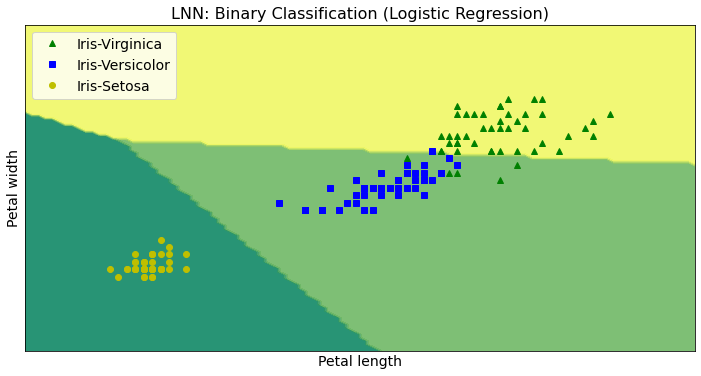

In [10]:
plt.figure(figsize=(12, 6))    

decision_boundary_class_colored(model, X)

plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("LNN: Binary Classification (Logistic Regression)", fontsize=16)
plt.xticks(())
plt.yticks(())
plt.show()